In [1]:
using DifferentialEquations
using ParameterizedFunctions
using Plots

# 核磁化モーメントの運動の古典描像  

（初版：2023年6月）  

古典力学描像の元で核磁気モーメント $\boldsymbol{\mu}$ の運動を考える。  

核磁気モーメントは角運動量 $\boldsymbol{L}$ と核磁気回転比 $\gamma$ を用いて

　　$ \displaystyle{\boldsymbol{\mu} = \gamma \boldsymbol{L}} $  

と書ける。  

角運動量 $\boldsymbol{L}$ の時間変化はトルクに等しく、外部磁場を $\boldsymbol{H}_0$ とすると、  

　　$ \displaystyle{\frac{d\boldsymbol{L}}{dt} = \boldsymbol{\mu} \times \boldsymbol{H}_0} $  

であり、核磁気モーメントの時間変化は  

　　$ \displaystyle{\frac{d\boldsymbol{\mu}}{dt} = \gamma (\boldsymbol{\mu} \times \boldsymbol{H}_0)} $  

となる。
この式に従い核磁気モーメントは歳差運動をする。
これをラーモアの歳差運動という。  

外部磁場の印可方向を $z$ 軸とすると、上記の微分方程式の各成分は  

　　$ \displaystyle{\frac{d\boldsymbol{\mu}}{dt} = \left( \frac{d\mu_x}{dt}, \frac{d\mu_y}{dt}, \frac{d\mu_z}{dt} \right) = \left( \gamma H_0 \mu_y, -\gamma H_0 \mu_x, 0 \right)} $  

となり、$\omega_0 = \gamma H_0$ とすると、  

　　$ \displaystyle{ \left( \frac{d\mu_x}{dt}, \frac{d\mu_y}{dt}, \frac{d\mu_z}{dt} \right) = \left( \omega_0 \mu_y, -\omega_0 \mu_x, 0 \right)} $$  

と書ける。ここで、$\omega_0$ は歳差運動の角周波数で、ラーモア周波数と呼ばれている。  

これをJuliaで計算する。

  1.313831 seconds (1.82 M allocations: 115.751 MiB, 4.52% gc time, 99.99% compilation time)


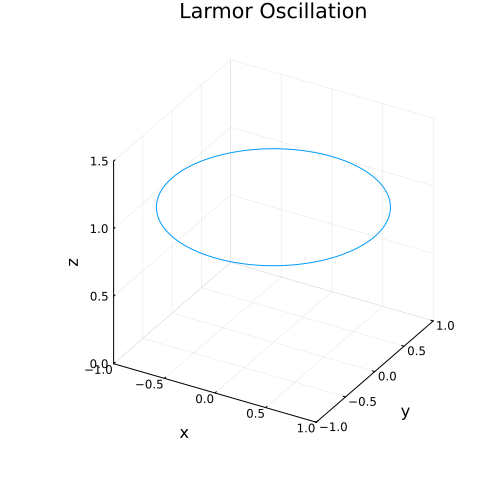

In [2]:
# 常微分方程式
g = @ode_def Larmor begin
    dx = ω0*y
    dy = -ω0*x
    dz = 0
end ω0

# 各種パラメータの設定
u0 = [1.0;0.0;1.0]
tspan = (0.0,1.0)
p = [1.0*2π]
prob = ODEProblem(g,u0,tspan,p);

# 計算
@time sol = solve(prob,Tsit5(),reltol=1e-8,abstol=1e-8);

# 描画
plot(sol,idxs=(1,2,3), title="Larmor Oscillation", xlabel="x", ylabel="y", zlabel="z", label="")
plot!(xrange=(-1,1), yrange=(-1,1), zrange=(0,1.5), size=(500,500))

[ Info: Saved animation to D:\larmor.gif


Plots.AnimatedGif("D:\\larmor.gif")
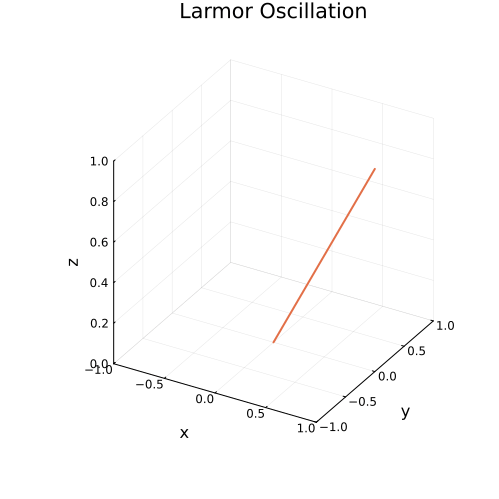

In [3]:
# アニメーションの表示
t = range(sol.prob.tspan...; length=10^4+1)
X, Y, Z = ((t -> sol(t)[i]).(t) for i in 1:3)

gr(fmt = :png)
anim = @animate for i in 1:100:length(X)
    @views x, y, z = X[1:i], Y[1:i], Z[1:i]
    A = plot(x, y, z; label="", lw=1.0, xlabel="x", ylabel="y", zlabel="z", title="Larmor Oscillation")
    A = plot!(xlim=(-1,1), ylim=(-1,1), zlim=(0,1))
    A = plot!([x[i],0], [y[i],0], [z[i],0], lw=2, legend=false)
    plot(A, size=(500, 500))
end
gif(anim, "larmor.gif", fps=20)

# 高周波磁場による核磁気モーメントの回転

外部磁場 $\boldsymbol{H}_0$ に加えて高周波磁場 $\boldsymbol{H}_1(t)$ を加える。その場合の核磁気モーメントの時間変化は  

　　$ \displaystyle{\frac{d\boldsymbol{\mu}}{dt} = \gamma \Bigl[ \boldsymbol{\mu} \times \bigl\{ \boldsymbol{H}_0 + \boldsymbol{H}_1(t) \bigr\} \Bigr]} $  

と書ける。  

　　$ \displaystyle{\boldsymbol{H}_1(t) = (H_1\cos\omega t, -H_1\sin\omega t, 0)} $  
  
とすると、上記の微分方程式の各成分は  

　　$ \displaystyle{ \frac{d\mu_x}{dt} =  \gamma H_0 \mu_y + \gamma H_1 \mu_z \sin\omega t} $  
  
　　$ \displaystyle{ \frac{d\mu_y}{dt} = -\gamma H_0 \mu_x + \gamma H_1 \mu_z \cos\omega t} $  
  
　　$ \displaystyle{ \frac{d\mu_z}{dt} = -\gamma H_1 (\mu_x\sin\omega t + \mu_y\cos\omega t)} $  

となり、$\omega_0 = \gamma H_0,\quad \omega_1 = \gamma H_1$ とすると、  

　　$ \displaystyle{ \frac{d\mu_x}{dt} =  \omega_0 \mu_y + \omega_1 \mu_z \sin\omega t} $  
  
　　$ \displaystyle{ \frac{d\mu_y}{dt} = -\omega_0 \mu_x + \omega_1 \mu_z \cos\omega t} $  
  
　　$ \displaystyle{ \frac{d\mu_z}{dt} = -\omega_1 (\mu_x\sin\omega t + \mu_y\cos\omega t)} $  

と書ける。

## 共鳴条件の時の核磁気モーメントの運動  

$\omega = \omega_0$ が共鳴条件である。  

核磁気モーメントは $\boldsymbol{H}_1(t)$ による回転角は $\theta = \omega_1 t$ により決まり、$180^\circ$ 回転させる $\boldsymbol{H}_1(t)$ を「πパルス」という。

πパルスを印可した時の核磁気モーメントの運動を計算する。

  0.881725 seconds (1.25 M allocations: 82.015 MiB, 4.90% gc time, 99.95% compilation time)


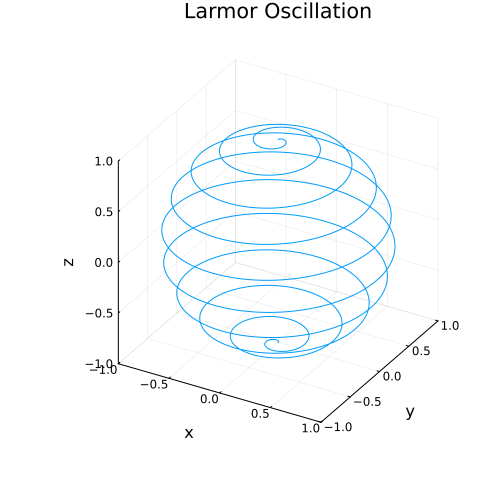

In [4]:
# 常微分方程式
g = @ode_def Larmor begin
    dx =  ω0*y + ω1*z*sin(ω*t)
    dy = -ω0*x + ω1*z*cos(ω*t) 
    dz = -ω1*x*sin(ω*t) - ω1*y*cos(ω*t)
end ω0 ω1 ω

# 各種パラメータの設定
ω0 = 10;
ω1 = 0.5;
ω  = 10; # ω=ω0なら共鳴条件
πpulsetime = π/ω1;

u0 = [0.0;0.0;1.0]
tspan = (0.0,πpulsetime)
p = [ω0; ω1; ω]
prob = ODEProblem(g,u0,tspan,p);

# 計算
@time sol = solve(prob,Tsit5(),reltol=1e-8,abstol=1e-8);

# 描画
plot(sol,idxs=(1,2,3), title="Larmor Oscillation", xlabel="x", ylabel="y", zlabel="z", label="")
plot!(xrange=(-1,1), yrange=(-1,1), zrange=(-1,1), size=(500,500))

[ Info: Saved animation to D:\larmorwithH1.gif


Plots.AnimatedGif("D:\\larmorwithH1.gif")
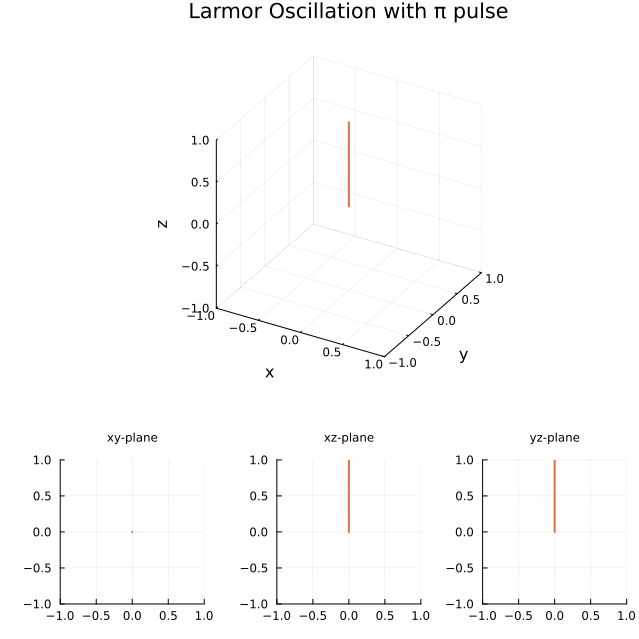

In [5]:
# アニメーションの表示
t = range(sol.prob.tspan...; length=10^4+1)
X, Y, Z = ((t -> sol(t)[i]).(t) for i in 1:3)
xlim = ylim = zlim = (-1,1);

gr(fmt = :png)
anim = @animate for i in 1:100:length(X)
    @views x, y, z = X[1:i], Y[1:i], Z[1:i]
    A = plot(x, y, z; label="", lw=1.0, xlabel="x", ylabel="y", zlabel="z", title="Larmor Oscillation with π pulse", xlim, ylim, zlim)
    A = plot!([x[i],0], [y[i],0], [z[i],0], lw=2, legend=false)
    B = plot(x, y; label="", lw=0.5, title="xy-plane", titlefontsize=8, xlim=xlim, ylim=ylim)
    B = plot!([x[i],0], [y[i],0], lw=2, legend=false, aspect_ratio=1)  
    C = plot(x, z; label="", lw=0.5, title="xz-plane", titlefontsize=8, xlim=xlim, ylim=zlim)
    C = plot!([x[i],0], [z[i],0], lw=2, legend=false, aspect_ratio=1)   
    D = plot(y, z; label="", lw=0.5, title="yz-plane", titlefontsize=8, xlim=ylim, ylim=zlim)
    D = plot!([y[i],0], [z[i],0], lw=2, legend=false, aspect_ratio=1)  
    layout = @layout [
        a{0.7h}
        [b c d]
    ]
    plot(A, B, C, D; layout, size=(640, 640))
end
gif(anim, "larmorwithH1.gif", fps=10)

[ Info: Saved animation to D:\Dropbox\Python_Julia\Julia\larmorwithH1.gif


Plots.AnimatedGif("D:\\Dropbox\\Python_Julia\\Julia\\larmorwithH1.gif")
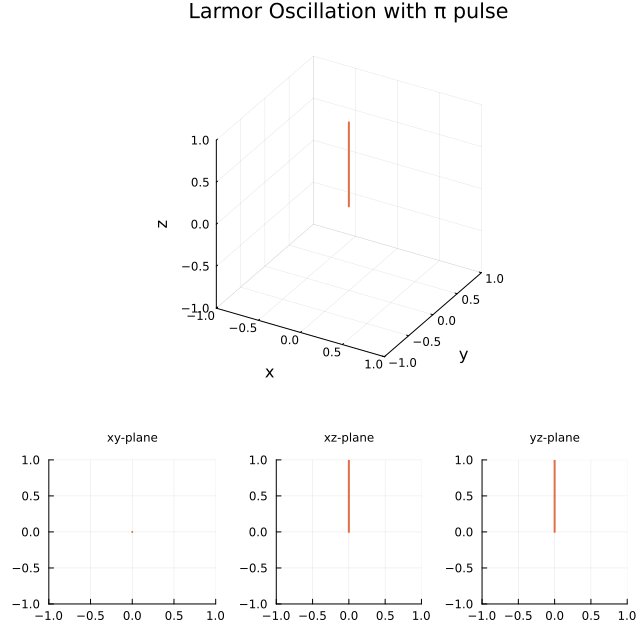

In [27]:
t = range(sol.prob.tspan...; length=10^4+1)
X, Y, Z = ((t -> sol(t)[i]).(t) for i in 1:3)
xlim = ylim = zlim = (-1,1);

gr(fmt = :png)
anim = @animate for i in 1:100:length(X)
    @views x, y, z = X[1:i], Y[1:i], Z[1:i]
    A = plot(x, y, z; label="", lw=1.0, xlabel="x", ylabel="y", zlabel="z", title="Larmor Oscillation with π pulse", xlim, ylim, zlim)
    A = plot!([x[i],0], [y[i],0], [z[i],0], lw=2, legend=false)
    B = plot(x, y; label="", lw=0.5, title="xy-plane", titlefontsize=8, xlim=xlim, ylim=ylim)
    B = plot!([x[i],0], [y[i],0], lw=2, legend=false)  
    C = plot(x, z; label="", lw=0.5, title="xz-plane", titlefontsize=8, xlim=xlim, ylim=zlim)
    C = plot!([x[i],0], [z[i],0], lw=2, legend=false)   
    D = plot(y, z; label="", lw=0.5, title="yz-plane", titlefontsize=8, xlim=ylim, ylim=zlim)
    D = plot!([y[i],0], [z[i],0], lw=2, legend=false)  
    layout = @layout [
        a{0.7h}
        [b c d]
    ]
    plot(A, B, C, D; layout, size=(640, 640))
end
gif(anim, "larmorwithH1.gif", fps=10)

## 共鳴条件を満たさないの時の核磁気モーメントの運動  

  0.877499 seconds (1.25 M allocations: 81.970 MiB, 3.57% gc time, 99.96% compilation time)


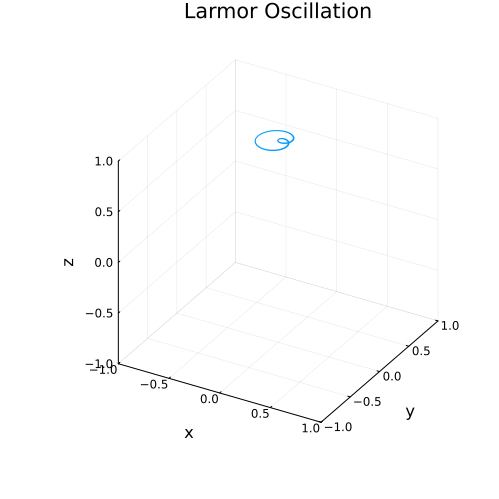

In [6]:
# 常微分方程式
g = @ode_def Larmor begin
    dx =  ω0*y + ω1*z*sin(ω*t)
    dy = -ω0*x + ω1*z*cos(ω*t) 
    dz = -ω1*x*sin(ω*t) - ω1*y*cos(ω*t)
end ω0 ω1 ω

# 各種パラメータの設定
ω0 = 10;
ω1 = 0.5;
ω  = 5; # ω=ω0なら共鳴条件
πpulsetime = π/ω1;

u0 = [0.0;0.0;1.0]
tspan = (0.0,πpulsetime)
p = [ω0; ω1; ω]
prob = ODEProblem(g,u0,tspan,p);

# 計算
@time sol = solve(prob,Tsit5(),reltol=1e-8,abstol=1e-8);

# 描画
plot(sol,idxs=(1,2,3), title="Larmor Oscillation", xlabel="x", ylabel="y", zlabel="z", label="")
plot!(xrange=(-1,1), yrange=(-1,1), zrange=(-1,1), size=(500,500))

[ Info: Saved animation to D:\larmorwithH1.gif


Plots.AnimatedGif("D:\\larmorwithH1.gif")
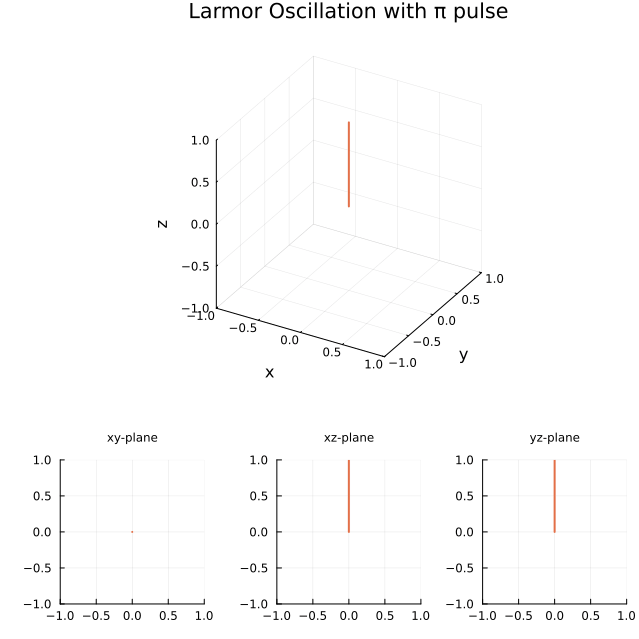

In [7]:
# アニメーションの表示
t = range(sol.prob.tspan...; length=10^4+1)
X, Y, Z = ((t -> sol(t)[i]).(t) for i in 1:3)
xlim = ylim = zlim = (-1,1);

gr(fmt = :png)
anim = @animate for i in 1:100:length(X)
    @views x, y, z = X[1:i], Y[1:i], Z[1:i]
    A = plot(x, y, z; label="", lw=1.0, xlabel="x", ylabel="y", zlabel="z", title="Larmor Oscillation with π pulse", xlim, ylim, zlim)
    A = plot!([x[i],0], [y[i],0], [z[i],0], lw=2, legend=false)
    B = plot(x, y; label="", lw=0.5, title="xy-plane", titlefontsize=8, xlim=xlim, ylim=ylim)
    B = plot!([x[i],0], [y[i],0], lw=2, legend=false, aspect_ratio=1)  
    C = plot(x, z; label="", lw=0.5, title="xz-plane", titlefontsize=8, xlim=xlim, ylim=zlim)
    C = plot!([x[i],0], [z[i],0], lw=2, legend=false, aspect_ratio=1)   
    D = plot(y, z; label="", lw=0.5, title="yz-plane", titlefontsize=8, xlim=ylim, ylim=zlim)
    D = plot!([y[i],0], [z[i],0], lw=2, legend=false, aspect_ratio=1)  
    layout = @layout [
        a{0.7h}
        [b c d]
    ]
    plot(A, B, C, D; layout, size=(640, 640))
end
gif(anim, "larmorwithH1.gif", fps=10)